# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]['lat']
        city_lng = city_weather["coord"]['lon']
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                          })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mirandopolis
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | flinders
Processing Record 4 of Set 1 | ulagan
Processing Record 5 of Set 1 | saint-philippe
Processing Record 6 of Set 1 | karaul
City not found. Skipping...
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | fortuna
Processing Record 9 of Set 1 | muhororo
Processing Record 10 of Set 1 | alekseyevsk
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | port blair
Processing Record 14 of Set 1 | kununurra
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | yago
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | vardo
Processing Record 20 of Set 1 | east london
Processing Record 21 of Set 1 | wagar
Processing Record 22 of Set 1 | bambous virieux
Processing Record 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mirandopolis,-21.1336,-51.1017,22.88,89,97,0.97,BR,1675554836
1,albany,42.6001,-73.9662,-10.79,49,72,1.62,US,1675554801
2,flinders,-34.5833,150.8552,26.70,43,0,2.68,AU,1675554837
3,ulagan,50.6321,87.9563,-8.76,93,100,0.83,RU,1675554838
4,saint-philippe,-21.3585,55.7679,24.77,86,99,4.53,RE,1675554838


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mirandopolis,-21.1336,-51.1017,22.88,89,97,0.97,BR,1675554836
1,albany,42.6001,-73.9662,-10.79,49,72,1.62,US,1675554801
2,flinders,-34.5833,150.8552,26.70,43,0,2.68,AU,1675554837
3,ulagan,50.6321,87.9563,-8.76,93,100,0.83,RU,1675554838
4,saint-philippe,-21.3585,55.7679,24.77,86,99,4.53,RE,1675554838


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

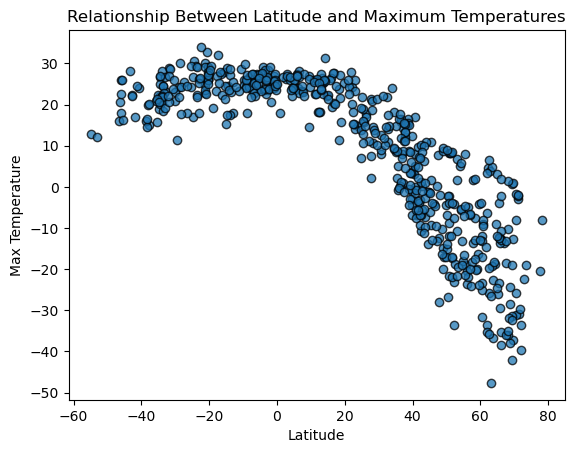

In [8]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]
plt.scatter(x_axis,y_axis, alpha=0.75, edgecolors='black')

# Incorporate the other graph properties
plt.title("Relationship Between Latitude and Maximum Temperatures")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

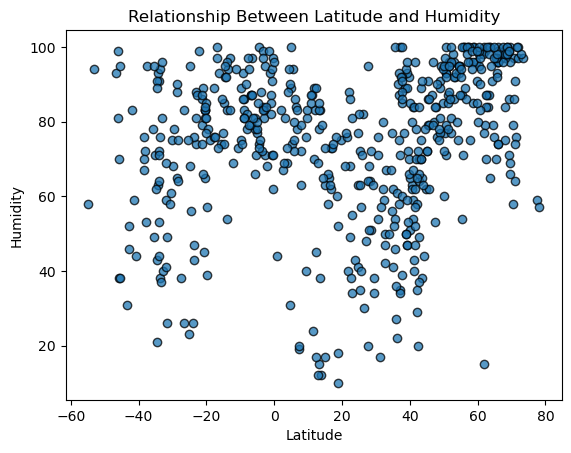

In [9]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]
plt.scatter(x_axis, y_axis, alpha=0.75, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Relationship Between Latitude and Humidity")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

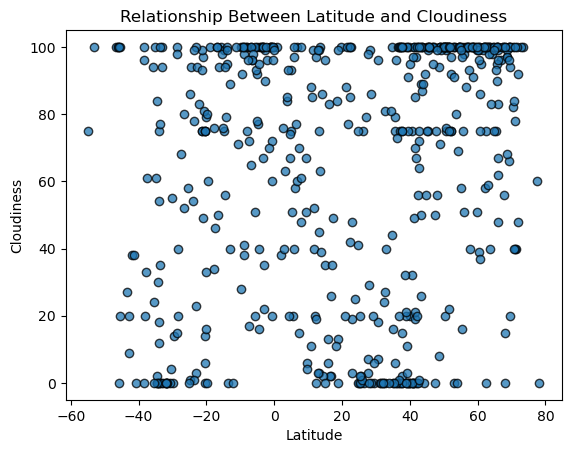

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]
plt.scatter(x_axis, y_axis, alpha=0.75, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Relationship Between Latitude and Cloudiness")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

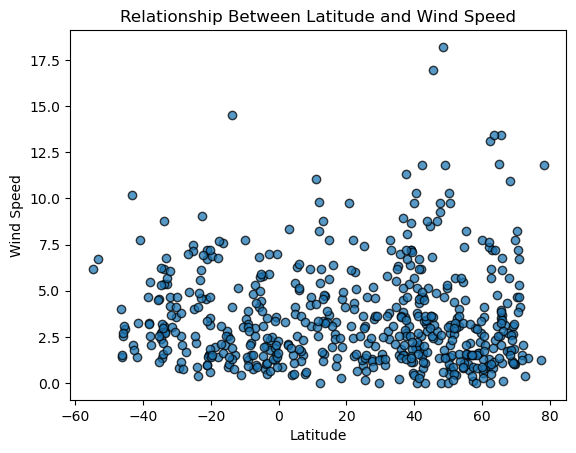

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]
plt.scatter(x_axis, y_axis, alpha=0.75, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Relationship Between Latitude and Wind Speed")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,albany,42.6001,-73.9662,-10.79,49,72,1.62,US,1675554801
3,ulagan,50.6321,87.9563,-8.76,93,100,0.83,RU,1675554838
5,hilo,19.7297,-155.0900,25.16,75,100,4.12,US,1675554777
6,fortuna,40.5982,-124.1573,16.86,63,75,10.29,US,1675554839
7,muhororo,0.9381,30.7594,17.83,44,100,0.84,UG,1675554840


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0 ]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mirandopolis,-21.1336,-51.1017,22.88,89,97,0.97,BR,1675554836
2,flinders,-34.5833,150.8552,26.70,43,0,2.68,AU,1675554837
4,saint-philippe,-21.3585,55.7679,24.77,86,99,4.53,RE,1675554838
9,cape town,-33.9258,18.4232,21.60,91,75,3.09,ZA,1675554772
10,hermanus,-34.4187,19.2345,22.11,93,30,2.76,ZA,1675554781


###  Temperature vs. Latitude Linear Regression Plot

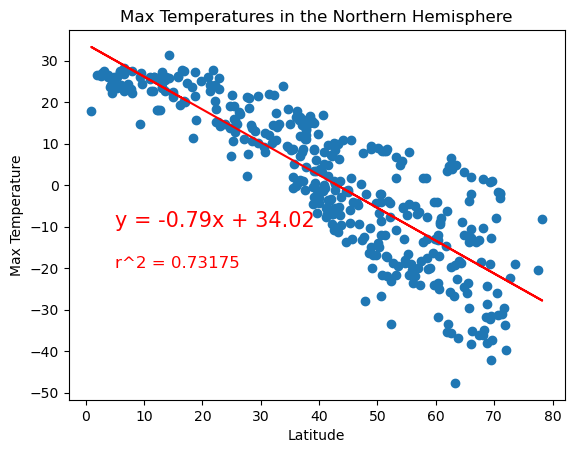

In [33]:
# Linear regression on Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title("Max Temperatures in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, color='red')
plt.annotate(line_eq,(5,-10),fontsize=15,color="red")
plt.annotate(f'''r^2 = {round(rvalue**2,5)}''',(5,-20),fontsize=12,color='red')
plt.show()


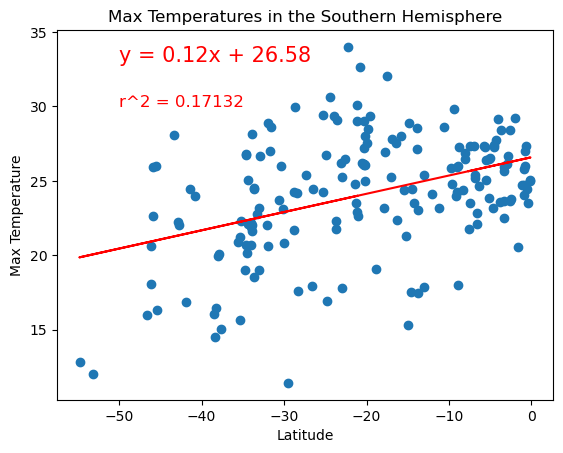

In [34]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title("Max Temperatures in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, color='red')
plt.annotate(line_eq,(-50,33),fontsize=15,color="red")
plt.annotate(f'''r^2 = {round(rvalue**2,5)}''',(-50,30),fontsize=12,color='red')
plt.show()

A distinctive, inverse linear relationship is observed between the latitude values and maximum observed temperatures in the northern hemisphere. Temperature consistently falls with as latitude increases north away from the equator.

Meanwhile, the southern hemisphere follows a concurrent trend with a linear regression showing a direct relationship between an increase in the latitude value towards the equator and maximum temperatures observed. 

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE